# Percepción computacional

El objetivo de esta actividad es familiarizarnos con las técnicas de eliminación de anomalías y de ajuste de intensidad. Debido a que son problemas comunes a los cuales nos enfrentaremos día a día para tener un banco de imagenes de prueba para los proyectos a los cuales estemos desarrollando. Para ello, en esta sección de esta actividad, aprenderemos a eliminar ruido para mejorar la calidad de las imagenes que tengamos a nuestra disposición. Para ello es necesario agregar ruido o defectos a nuestras imagenes, usaremos una función para agregar ruido de sal y pimienta.

## Eliminación de anomalías

In [1]:
import cv2 as cv
import numpy as np
import random
import matplotlib.pyplot as plt

El objetivo de la función es agregar pixeles blancos y negros a una imagen, es ahí donde viene el significado de sal y pimienta, siendo la sal los pixeles blancos y la pimienta los pixeles negros.

In [2]:
# Función para añadir ruido de sal y pimienta usando OpenCV
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size
    num_salt = int(total_pixels * salt_prob)
    num_pepper = int(total_pixels * pepper_prob)

    # Añadir ruido de sal (blanco)
    for _ in range(num_salt):
        y_coord = random.randint(0, image.shape[0] - 1)
        x_coord = random.randint(0, image.shape[1] - 1)
        noisy_image[y_coord, x_coord] = 255  # Asumiendo imagen de 8 bits

    # Añadir ruido de pimienta (negro)
    for _ in range(num_pepper):
        y_coord = random.randint(0, image.shape[0] - 1)
        x_coord = random.randint(0, image.shape[1] - 1)
        noisy_image[y_coord, x_coord] = 0  # Asumiendo imagen de 8 bits

    return noisy_image

Una vez definida nuestra función para agregar ruido, es necesario saber como mejorar la calidad de las imagenes afectadas. Para ello usaremos un filtro de mediana manual.

La función de este filtro en pocas palabras, es reemplazar los pixeles afectados por el ruido de sal y pimienta usando la mediana de los pixeles de su vencindad, lo cual preserva los bordes de esta vecindad (kernel) mientras elimina el ruido.

El filtro de mediana funciona con bordes y vecindades (kernel):
* Borde: Se determina el tamaño del borde como la mitad del tamaño de la vecindad o kernel, algo como 5 // 2 = 2, lo que permite que el kernel o la vecindad se mantenga sin salirse de su limite.
* Vecindad o kernel: Es una sección cuadrada de la imagen definida por un tamaño, ejemplo un kernel = 5, significa que la vecindad o sección de esta imagen tendra un tamaño de 5x5.

Para asignar el valor del pixel a tratar, se ordenan los valores de la vecindad y de ahi se saca la mediana que se asigna al pixel a tratar.

In [3]:
def median_filter_manual(image, kernel_size=3):
    pad_size = kernel_size // 2
    height, width = image.shape
    padded_image = np.zeros((height + 2 * pad_size, width + 2 * pad_size), dtype=np.uint8)

    # Rellenar la imagen con ceros (paddings)
    padded_image[pad_size:pad_size + height, pad_size:pad_size + width] = image

    filtered_image = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            # Extraer la vecindad
            neighborhood = []
            for k in range(kernel_size):
                for l in range(kernel_size):
                    neighborhood.append(padded_image[i + k, j + l])

            # Calcular la mediana
            neighborhood.sort()
            median = neighborhood[len(neighborhood) // 2]
            
            # Asignar la mediana al píxel actual
            filtered_image[i, j] = median

    return filtered_image

Hay librerías optimizadas como opencv que optimizan estas funciones para tener resultados optimos debido a que la exactitud es clave para la mayoría de los casos, cuando se trata de usar imagenes para el entratamiento de modelos de inteligencia artificial.

In [4]:
def median_filter_opencv(image, kernel_size=3):
    return cv.medianBlur(image, kernel_size)

In [5]:
img01 = cv.imread('./CochesVarios/Cars3.png', cv.IMREAD_GRAYSCALE)
img02 = cv.imread('./CochesVarios/Cars11.png', cv.IMREAD_GRAYSCALE)

In [6]:
salt_prob = 0.05  # Probability of salt noise
pepper_prob = 0.05  # Probability of pepper noise

noisy_image_01 = add_salt_and_pepper_noise(img01, salt_prob, pepper_prob)
noisy_image_02 = add_salt_and_pepper_noise(img02, salt_prob, pepper_prob)

In [7]:
denoised_image_manual_01 = median_filter_manual(noisy_image_01, kernel_size=3)
denoised_image_manual_02 = median_filter_manual(noisy_image_02, kernel_size=3)

denoised_image_opencv_01 = median_filter_opencv(noisy_image_01, kernel_size=3)
denoised_image_opencv_02 = median_filter_opencv(noisy_image_02, kernel_size=3)

Una vez asignada la probabilidad de que salga un pixel de sal o de pimienta, mostraremos los resultados con dos imagenes, donde se compara de manera visual los resultados obtenidos aplicando las funciones previamente descritas.

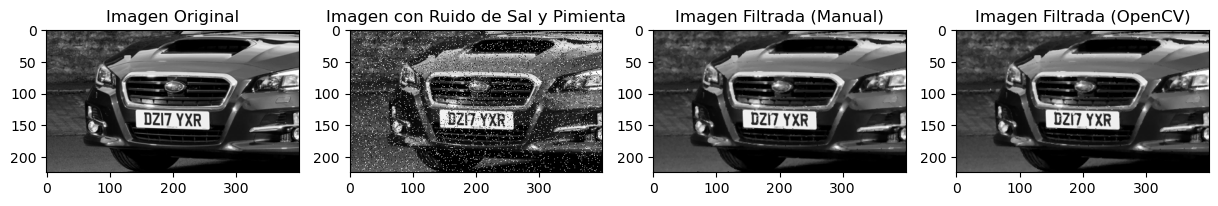

In [8]:
# Mostrar las imágenes
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Imagen Original')
plt.imshow(img01, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Imagen con Ruido de Sal y Pimienta')
plt.imshow(noisy_image_01, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Imagen Filtrada (Manual)')
plt.imshow(denoised_image_manual_01, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Imagen Filtrada (OpenCV)')
plt.imshow(denoised_image_opencv_01, cmap='gray')

plt.show()

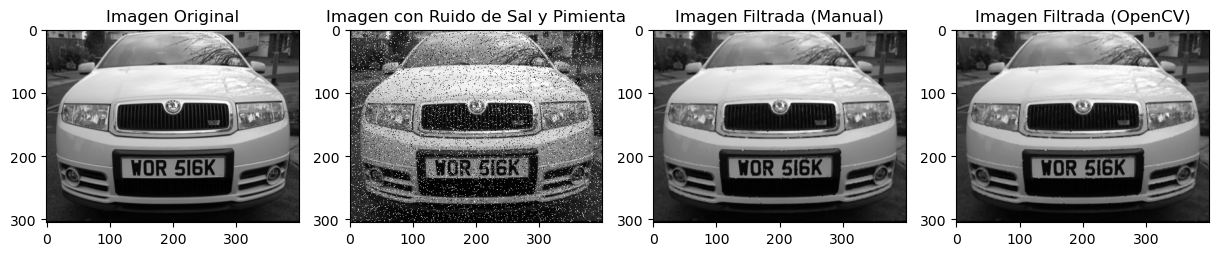

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Imagen Original')
plt.imshow(img02, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Imagen con Ruido de Sal y Pimienta')
plt.imshow(noisy_image_02, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Imagen Filtrada (Manual)')
plt.imshow(denoised_image_manual_02, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Imagen Filtrada (OpenCV)')
plt.imshow(denoised_image_opencv_02, cmap='gray')

plt.show()

A simple vista pareciera que obtenemos los mismos resultados aplicando los filtros manual y el que pone a disposición OpenCV, pero, como lo mencioné anteriormente, la exactitud es clave para tener el resultado optimo. Para ello es necesario evaluar los resultados, usaremos el Error Cuadrático Medio (MSE), una métrica muy usada para evaluar la calidad de las imagenes filtradas respecto a la original.

In [10]:
# Función para calcular el MSE
def calculate_mse(image1, image2):
    return np.mean((image1 - image2) ** 2)


In [11]:
# Calcular MSE y PSNR para ambos métodos
mse_manual_01 = calculate_mse(img01, denoised_image_manual_01)
mse_opencv_01 = calculate_mse(img01, denoised_image_opencv_01)

# Mostrar los resultados
print(f'MSE Manual: {mse_manual_01}')
print(f'MSE OpenCV: {mse_opencv_01}')

MSE Manual: 22.223455555555557
MSE OpenCV: 21.912355555555557


In [12]:
mse_manual_02 = calculate_mse(img02, denoised_image_manual_02)
mse_opencv_02 = calculate_mse(img02, denoised_image_opencv_02)

# Mostrar los resultados
print(f'MSE Manual: {mse_manual_02}')
print(f'MSE OpenCV: {mse_opencv_02}')

MSE Manual: 15.986713114754098
MSE OpenCV: 15.864590163934427


Un MSE bajo significa que hay una similitud muy alta a la original y en caso contrario, un MSE alto significa que hay poca similitud a la original y por ende, el resultado no es el esperado.

Por lo tanto, los resultados obtenidos en este ejercicio demuestran que la implementación que ofrece OpenCV ofrece mejores resultados, aunque esto puede variar dependiendo del trato que tenga la imagen antes de realizar el tratamiento, ya sea mejorar el contraste de la imagen o aplicar otras tecnicas, dependiendo de nuestro caso que estemos desarrollando.

## Mejora de contraste de imágenes

En la anterior actividad concluí que a veces para tener mejores resultados es necesario mejorar la imagen antes de pasar por otras técnicas de mejorarmiento de imagenes, tal como el filtro de mediana, anteriormente descrito. Para esta actividad usaremos el método de ecualización del histograma.

### Histograma
Es una representación gráfica de la intensidad de colores, hablando de imágenes, donde para imagenes de 8 bits de profundidad de color de 0 (negro) a 255 (representación maxima del rango de color, en una escala de grises, sería el color blanco).

#### Componentes de un histograma
* Eje X: Son los valores de intensidad de los pixeles.
* Eje Y: Representa la frecuencia que tienen cada nivel de intensidad.

Para esta practica, usaremos una de las imagenes previamente cargadas en escala de grises y procederemos a calcular el histograma.

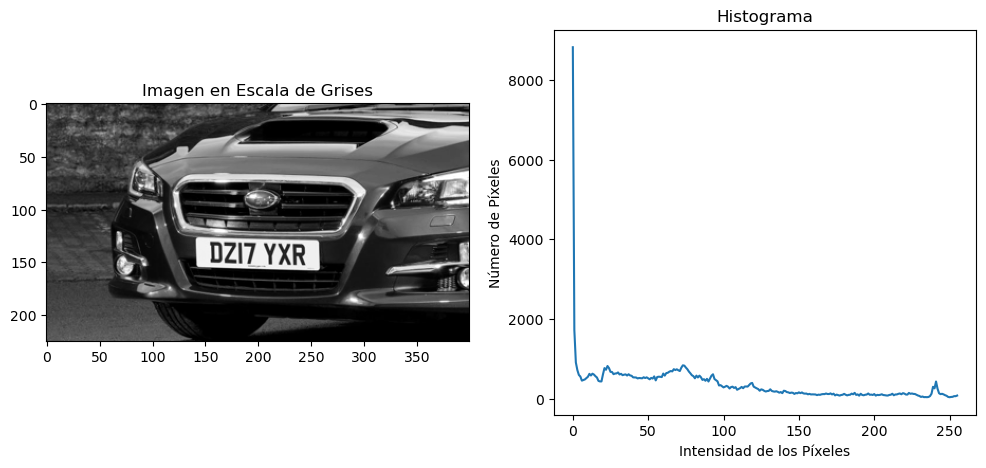

In [13]:
# Función para calcular el histograma manualmente
def calculate_histogram(image):
    hist = np.zeros(256, dtype=int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist[image[i, j]] += 1
    return hist
hist = calculate_histogram(img01)
# Mostrar la imagen y su histograma
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen en Escala de Grises')
plt.imshow(img01, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Histograma')
plt.plot(hist)
plt.xlabel('Intensidad de los Píxeles')
plt.ylabel('Número de Píxeles')

plt.show()

La funcion para la distribución acumulativa a partir de un histograma, donde se calcula la suma acumulativa del histograma y se normaliza para que los valores vayan del 0 al máximo valor del histograma para facilitar la visualización.

Después se realiza una función para mostrar la imagen ecualizada, usando una tabla de búsqueda (LUT) que mapea el nivel de intensidad original a uno nuevo basado en la CDF.

In [14]:
# Función para calcular la CDF manualmente
def calculate_cdf(hist):
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()  # Normalizar para visualizar
    return cdf, cdf_normalized

# Función para ecualizar la imagen manualmente usando la CDF
def equalize_image_manual(image, cdf):
    cdf_min = cdf[np.nonzero(cdf)].min()
    lut = ((cdf - cdf_min) / (cdf.max() - cdf_min) * 255).astype(np.uint8)
    equalized_image = lut[image]
    return equalized_image

Aqui se define el uso de la función de OpenCV para cacular el histograma de la imagen y luego lo convierte en un array unidimencional.

In [15]:
# Función para calcular la CDF usando OpenCV
def calculate_cdf_opencv(image):
    hist = cv.calcHist([image], [0], None, [256], [0, 256]).flatten()
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()  # Normalizar para visualizar
    return cdf, cdf_normalized

In [16]:
# Calcular el histograma y la CDF manualmente
cdf_manual, cdf_manual_normalized = calculate_cdf(hist)

# Calcular la CDF usando OpenCV
cdf_opencv, cdf_opencv_normalized = calculate_cdf_opencv(img01)

In [17]:
# Ecualizar la imagen manualmente
equalized_image_manual = equalize_image_manual(img01, cdf_manual)

# Ecualizar la imagen usando OpenCV
equalized_image_opencv = cv.equalizeHist(img01)

Aqui mostramos los resultados obtenidos con la implementación de las funciones manuales y las que ofrece OpenCV.

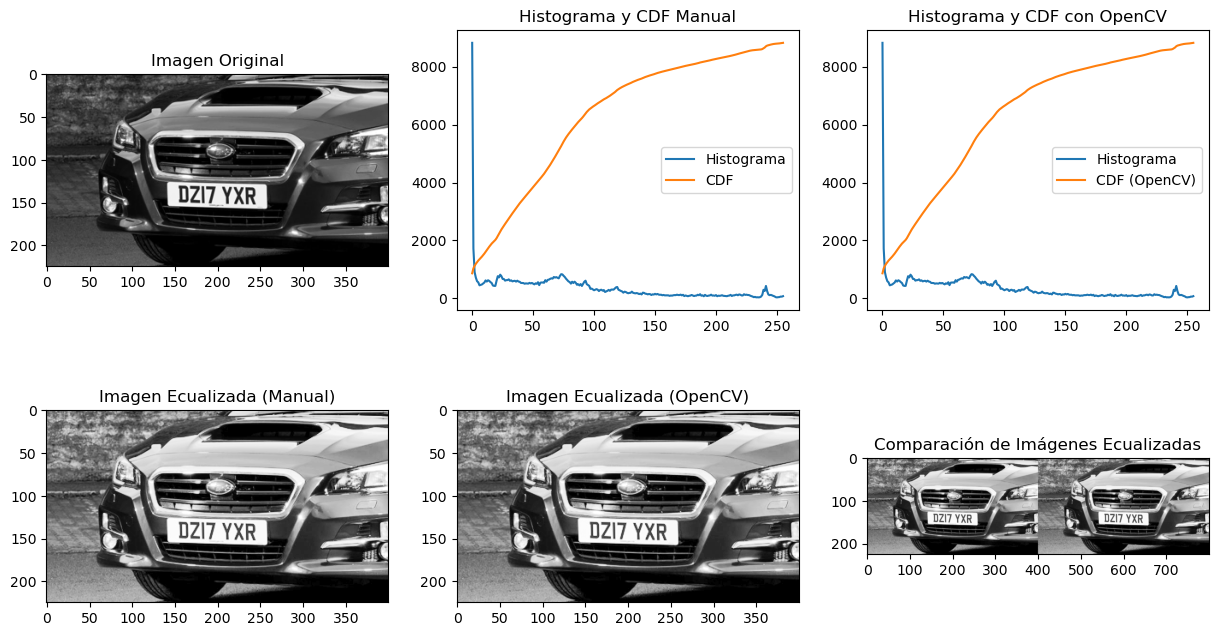

In [18]:
# Comparar los resultados
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.title('Imagen Original')
plt.imshow(img01, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('Histograma y CDF Manual')
plt.plot(hist, label='Histograma')
plt.plot(cdf_manual_normalized, label='CDF')
plt.legend()

plt.subplot(2, 3, 3)
plt.title('Histograma y CDF con OpenCV')
plt.plot(hist, label='Histograma')
plt.plot(cdf_opencv_normalized, label='CDF (OpenCV)')
plt.legend()

plt.subplot(2, 3, 4)
plt.title('Imagen Ecualizada (Manual)')
plt.imshow(equalized_image_manual, cmap='gray')

plt.subplot(2, 3, 5)
plt.title('Imagen Ecualizada (OpenCV)')
plt.imshow(equalized_image_opencv, cmap='gray')

plt.subplot(2, 3, 6)
plt.title('Comparación de Imágenes Ecualizadas')
plt.imshow(np.hstack((equalized_image_manual, equalized_image_opencv)), cmap='gray')

plt.show()

Por último, comparamos de manera visual los histogramas obtenidos despues de la ecualización.

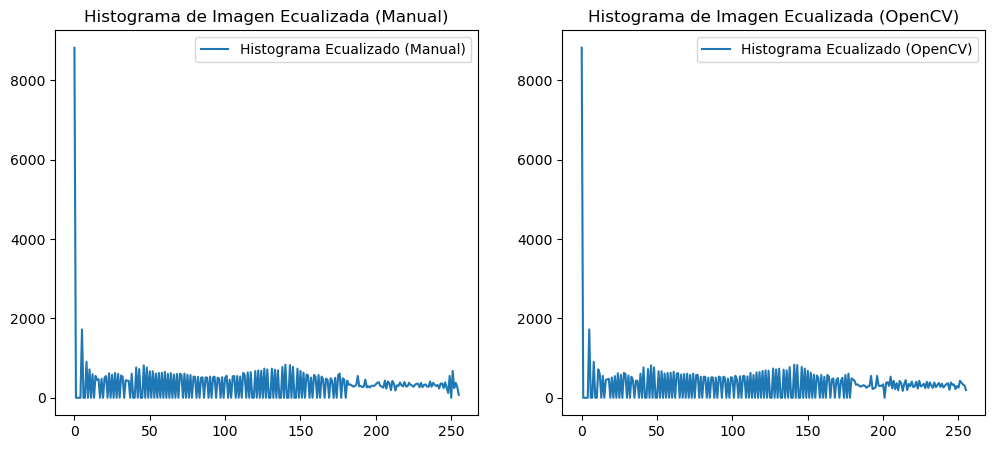

In [20]:
# Comparar los histogramas de las imágenes ecualizadas
hist_eq_manual = calculate_histogram(equalized_image_manual)
hist_eq_opencv = cv.calcHist([equalized_image_opencv], [0], None, [256], [0, 256]).flatten()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Histograma de Imagen Ecualizada (Manual)')
plt.plot(hist_eq_manual, label='Histograma Ecualizado (Manual)')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Histograma de Imagen Ecualizada (OpenCV)')
plt.plot(hist_eq_opencv, label='Histograma Ecualizado (OpenCV)')
plt.legend()

plt.show()

Por lo tanto, el uso de histogramas visuales, nos ayuda a entender y comprender el contenido de la imagen, una aplicación de los histogramas ayudan a los fotografos a tener mejores resultados en sus fotos y para nosotros, nos ayuda a saber que tecnica podemos usar para aprovechar al máximo la información que nos pueden ofrecer las imagenes para sus usos en modelos de inteligencia artificial entre otros.